# Text Preprocessing


In [15]:
import nltk
import spacy
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import pandas as pd

In [16]:
!pip install -q kaggle
!kaggle datasets download -d atifaliak/youtube-comments-dataset
!unzip -qq youtube-comments-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/atifaliak/youtube-comments-dataset
License(s): DbCL-1.0
youtube-comments-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
replace YoutubeCommentsDataSet.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [17]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
df = pd.read_csv("/content/YoutubeCommentsDataSet.csv")
df.drop("Sentiment", axis=1, inplace=True)
df

,Comment
0,lets not forget that apple pay in 2014 require...
1,here in nz 50 of retailers don’t even have con...
2,i will forever acknowledge this channel with t...
3,whenever i go to a place that doesn’t take app...
4,apple pay is so convenient secure and easy to ...
...,...
18403,i really like the point about engineering tool...
18404,i’ve just started exploring this field and thi...
18405,excelente video con una pregunta filosófica pr...
18406,hey daniel just discovered your channel a coup...


## Case Folding

In [19]:
df['lower_case'] = df['Comment'].str.lower()
df

,Comment,lower_case
0,lets not forget that apple pay in 2014 require...,lets not forget that apple pay in 2014 require...
1,here in nz 50 of retailers don’t even have con...,here in nz 50 of retailers don’t even have con...
2,i will forever acknowledge this channel with t...,i will forever acknowledge this channel with t...
3,whenever i go to a place that doesn’t take app...,whenever i go to a place that doesn’t take app...
4,apple pay is so convenient secure and easy to ...,apple pay is so convenient secure and easy to ...
...,...,...
18403,i really like the point about engineering tool...,i really like the point about engineering tool...
18404,i’ve just started exploring this field and thi...,i’ve just started exploring this field and thi...
18405,excelente video con una pregunta filosófica pr...,excelente video con una pregunta filosófica pr...
18406,hey daniel just discovered your channel a coup...,hey daniel just discovered your channel a coup...


## Tokenization

In [20]:
#NLTK
df['tokens_nltk'] = df['lower_case'].astype(str).apply(lambda x: word_tokenize(x))
print("Text:", df['lower_case'][0])
print("Tokenization (NLTK):", df['tokens_nltk'][0])

Text: lets not forget that apple pay in 2014 required a brand new iphone in order to use it a significant portion of apples user base wasnt able to use it even if they wanted to as each successive iphone incorporated the technology and older iphones were replaced the number of people who could use the technology increased
Tokenization (NLTK): ['lets', 'not', 'forget', 'that', 'apple', 'pay', 'in', '2014', 'required', 'a', 'brand', 'new', 'iphone', 'in', 'order', 'to', 'use', 'it', 'a', 'significant', 'portion', 'of', 'apples', 'user', 'base', 'wasnt', 'able', 'to', 'use', 'it', 'even', 'if', 'they', 'wanted', 'to', 'as', 'each', 'successive', 'iphone', 'incorporated', 'the', 'technology', 'and', 'older', 'iphones', 'were', 'replaced', 'the', 'number', 'of', 'people', 'who', 'could', 'use', 'the', 'technology', 'increased']


In [21]:
#SPACYnn
#python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

In [23]:
df['tokens_spacy'] = list(nlp.pipe(df['lower_case'].astype(str)))
df['tokens_spacy'] = df['tokens_spacy'].apply(lambda doc: [token.text for token in doc])
print("Text:", df['lower_case'][0])
print("Tokenization (SpaCy):", df['tokens_spacy'][0])

Text: lets not forget that apple pay in 2014 required a brand new iphone in order to use it a significant portion of apples user base wasnt able to use it even if they wanted to as each successive iphone incorporated the technology and older iphones were replaced the number of people who could use the technology increased
Tokenization (SpaCy): ['lets', 'not', 'forget', 'that', 'apple', 'pay', 'in', '2014', 'required', 'a', 'brand', 'new', 'iphone', 'in', 'order', 'to', 'use', 'it', 'a', 'significant', 'portion', 'of', 'apples', 'user', 'base', 'was', 'nt', 'able', 'to', 'use', 'it', 'even', 'if', 'they', 'wanted', 'to', 'as', 'each', 'successive', 'iphone', 'incorporated', 'the', 'technology', 'and', 'older', 'iphones', 'were', 'replaced', 'the', 'number', 'of', 'people', 'who', 'could', 'use', 'the', 'technology', 'increased']


## Stemming

In [24]:
def stem(tokens_nltk):
    stemmer = PorterStemmer()
    stems = [stemmer.stem(word) for word in tokens_nltk]
    return stems
df['stems_nltk'] = df['tokens_nltk'].apply(lambda x: stem(x))
print("Tokenization (NLTK):", df['tokens_nltk'][0])
print("Stemming:", df['stems_nltk'][0])

df['stems_spacy'] = df['tokens_spacy'].apply(lambda x: stem(x))
print("Tokenization (SpaCy):", df['tokens_spacy'][0])
print("Stemming:", df['stems_spacy'][0])

Tokenization (NLTK): ['lets', 'not', 'forget', 'that', 'apple', 'pay', 'in', '2014', 'required', 'a', 'brand', 'new', 'iphone', 'in', 'order', 'to', 'use', 'it', 'a', 'significant', 'portion', 'of', 'apples', 'user', 'base', 'wasnt', 'able', 'to', 'use', 'it', 'even', 'if', 'they', 'wanted', 'to', 'as', 'each', 'successive', 'iphone', 'incorporated', 'the', 'technology', 'and', 'older', 'iphones', 'were', 'replaced', 'the', 'number', 'of', 'people', 'who', 'could', 'use', 'the', 'technology', 'increased']
Stemming: ['let', 'not', 'forget', 'that', 'appl', 'pay', 'in', '2014', 'requir', 'a', 'brand', 'new', 'iphon', 'in', 'order', 'to', 'use', 'it', 'a', 'signific', 'portion', 'of', 'appl', 'user', 'base', 'wasnt', 'abl', 'to', 'use', 'it', 'even', 'if', 'they', 'want', 'to', 'as', 'each', 'success', 'iphon', 'incorpor', 'the', 'technolog', 'and', 'older', 'iphon', 'were', 'replac', 'the', 'number', 'of', 'peopl', 'who', 'could', 'use', 'the', 'technolog', 'increas']
Tokenization (SpaCy

## Lemmatization

In [25]:
def lemma(tokens_nltk):
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(word, pos="v") for word in tokens_nltk]
    return lemmas
df['lemmas_nltk'] = df['tokens_nltk'].apply(lambda x: lemma(x))
print("Tokenization (NLTK):", df['tokens_nltk'][0])
print("Lemmatization:", df['lemmas_nltk'][0])

df['lemmas_spacy'] = df['tokens_spacy'].apply(lambda x: lemma(x))
print("Tokenization (SpaCy):", df['tokens_spacy'][0])
print("Lemmatization:", df['lemmas_spacy'][0])

Tokenization (NLTK): ['lets', 'not', 'forget', 'that', 'apple', 'pay', 'in', '2014', 'required', 'a', 'brand', 'new', 'iphone', 'in', 'order', 'to', 'use', 'it', 'a', 'significant', 'portion', 'of', 'apples', 'user', 'base', 'wasnt', 'able', 'to', 'use', 'it', 'even', 'if', 'they', 'wanted', 'to', 'as', 'each', 'successive', 'iphone', 'incorporated', 'the', 'technology', 'and', 'older', 'iphones', 'were', 'replaced', 'the', 'number', 'of', 'people', 'who', 'could', 'use', 'the', 'technology', 'increased']
Lemmatization: ['let', 'not', 'forget', 'that', 'apple', 'pay', 'in', '2014', 'require', 'a', 'brand', 'new', 'iphone', 'in', 'order', 'to', 'use', 'it', 'a', 'significant', 'portion', 'of', 'apples', 'user', 'base', 'wasnt', 'able', 'to', 'use', 'it', 'even', 'if', 'they', 'want', 'to', 'as', 'each', 'successive', 'iphone', 'incorporate', 'the', 'technology', 'and', 'older', 'iphones', 'be', 'replace', 'the', 'number', 'of', 'people', 'who', 'could', 'use', 'the', 'technology', 'incr

## Remove Stopwords

In [26]:
def stop_w(tokens_nltk):
    stop_words = set(stopwords.words("english"))
    tokens_filtered = [word for word in tokens_nltk if word.lower() not in stop_words]
    return tokens_filtered
df['remove_stop_words_nltk'] = df['tokens_nltk'].apply(lambda x: stop_w(x))
print("Tokenization (NLTK):", df['tokens_nltk'][0])
print("Stopword Removal:", df['remove_stop_words_nltk'][0])

df['remove_stop_words_spacy'] = df['tokens_spacy'].apply(lambda x: stop_w(x))
print("Tokenization (SpaCy):", df['tokens_spacy'][0])
print("Stopword Removal:", df['remove_stop_words_spacy'][0])

Tokenization (NLTK): ['lets', 'not', 'forget', 'that', 'apple', 'pay', 'in', '2014', 'required', 'a', 'brand', 'new', 'iphone', 'in', 'order', 'to', 'use', 'it', 'a', 'significant', 'portion', 'of', 'apples', 'user', 'base', 'wasnt', 'able', 'to', 'use', 'it', 'even', 'if', 'they', 'wanted', 'to', 'as', 'each', 'successive', 'iphone', 'incorporated', 'the', 'technology', 'and', 'older', 'iphones', 'were', 'replaced', 'the', 'number', 'of', 'people', 'who', 'could', 'use', 'the', 'technology', 'increased']
Stopword Removal: ['lets', 'forget', 'apple', 'pay', '2014', 'required', 'brand', 'new', 'iphone', 'order', 'use', 'significant', 'portion', 'apples', 'user', 'base', 'wasnt', 'able', 'use', 'even', 'wanted', 'successive', 'iphone', 'incorporated', 'technology', 'older', 'iphones', 'replaced', 'number', 'people', 'could', 'use', 'technology', 'increased']
Tokenization (SpaCy): ['lets', 'not', 'forget', 'that', 'apple', 'pay', 'in', '2014', 'required', 'a', 'brand', 'new', 'iphone', 'i

## Word Cloud

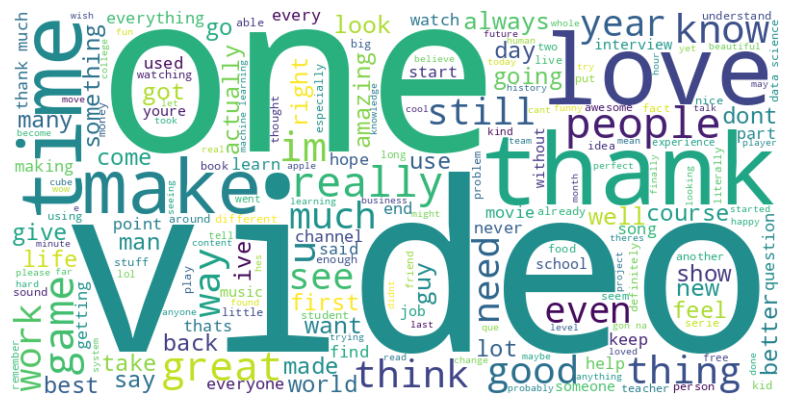

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join([" ".join(words) for words in df['remove_stop_words_nltk']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


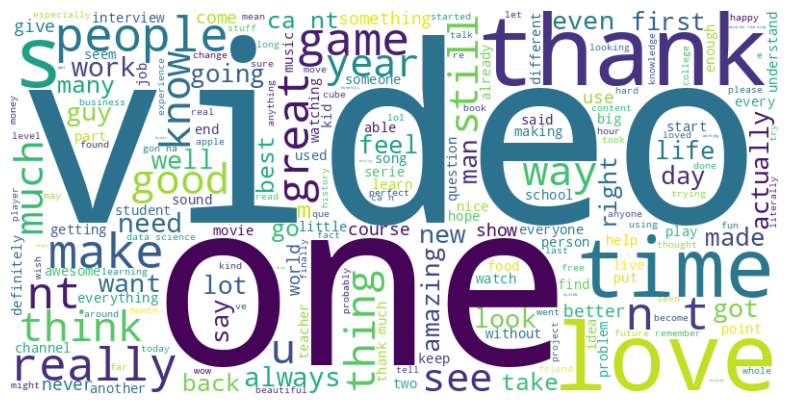

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join([" ".join(words) for words in df['remove_stop_words_spacy']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()